In [18]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'   
import tensorflow as tf


In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np


In [20]:
 
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

 
x_train, x_test = x_train / 255.0, x_test / 255.0
 
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")


Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


In [21]:
 
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),

    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # 10 classes
])


In [14]:
 
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

 
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.3419 - loss: 1.7647 - val_accuracy: 0.5489 - val_loss: 1.2599
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.5688 - loss: 1.2162 - val_accuracy: 0.5980 - val_loss: 1.1236
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.6324 - loss: 1.0419 - val_accuracy: 0.6447 - val_loss: 1.0123
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.6728 - loss: 0.9324 - val_accuracy: 0.6621 - val_loss: 0.9484
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.6937 - loss: 0.8662 - val_accuracy: 0.6773 - val_loss: 0.9208
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7195 - loss: 0.7972 - val_accuracy: 0.6704 - val_loss: 0.9352
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7373 - loss: 0.7471 - val_accuracy: 0.6996 - val_loss: 0.8782
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.7555 -

In [15]:
 
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7065 - loss: 0.8973

Test Accuracy: 0.6951


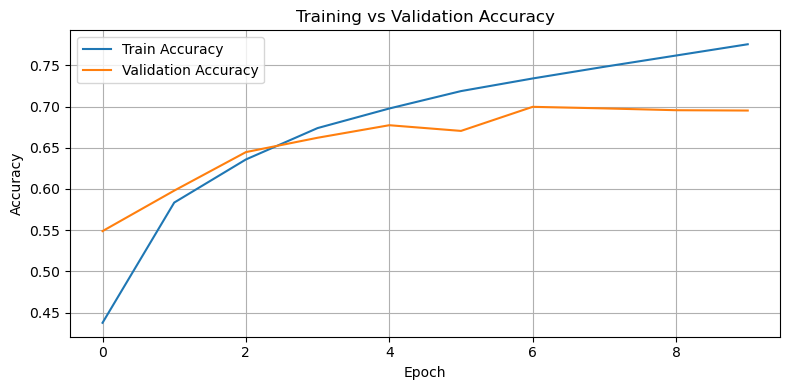

In [16]:
 
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


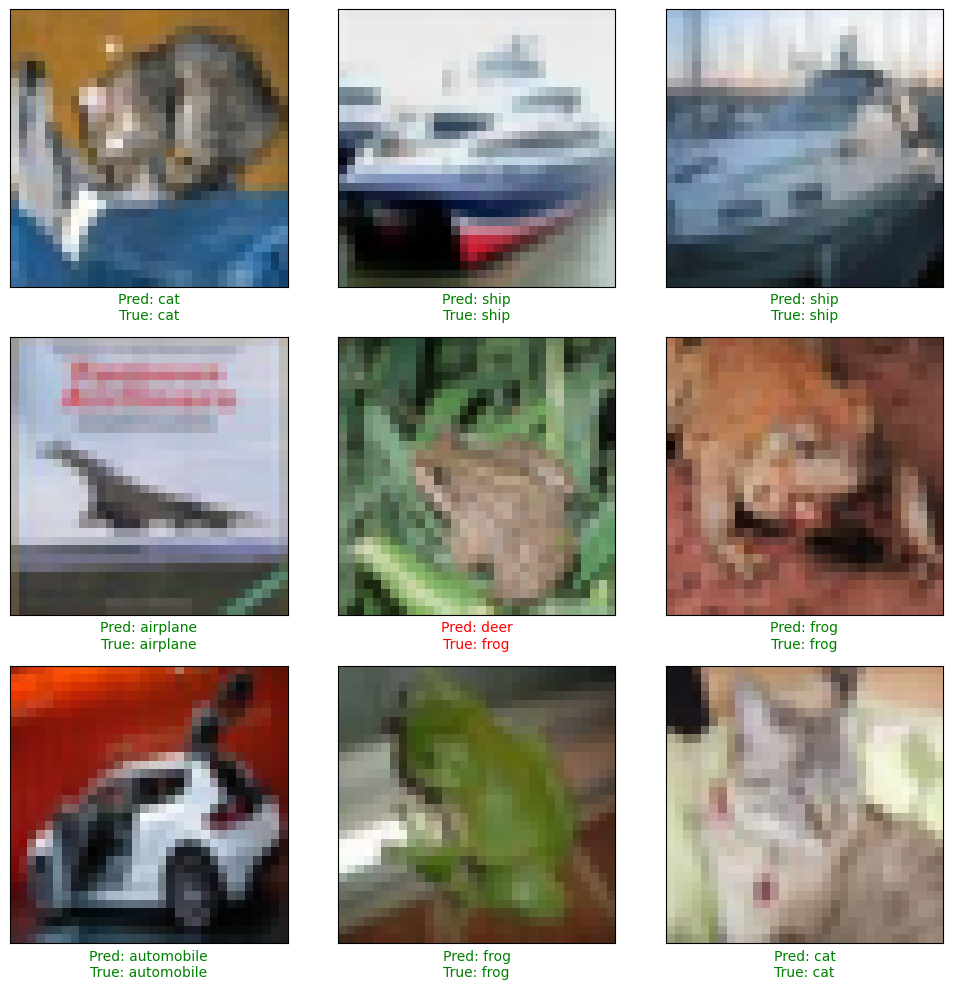

In [17]:
 
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = y_test.flatten()

 
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[i])
    plt.xticks([]), plt.yticks([]), plt.grid(False)
    color = 'green' if predicted_labels[i] == true_labels[i] else 'red'
    plt.xlabel(f"Pred: {class_names[predicted_labels[i]]}\nTrue: {class_names[true_labels[i]]}", color=color)
plt.tight_layout()
plt.show()
